In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
data=pd.read_csv('hr_data.csv')
data

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [7]:
#numerical analysis

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


### there are 6 numeric  features and 2 categorical features

In [13]:
data.shape

(14999, 9)

In [14]:
data.size

134991

In [15]:
data.dtypes

employee_id               int64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
Work_accident             int64
left                      int64
promotion_last_5years     int64
department               object
salary                   object
dtype: object

In [16]:
data.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [31]:
data

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


In [32]:
data.department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [33]:
data.salary.unique()

array(['low', 'medium', 'high'], dtype=object)

In [38]:
data.Work_accident.unique()

array([0, 1], dtype=int64)

In [41]:
#loading excel file of employee satisfaction_evalution
df2=pd.read_excel('employee_satisfaction_evaluation.xlsx')
df2

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52
...,...,...,...
14994,87670,0.40,0.57
14995,87673,0.37,0.48
14996,87679,0.37,0.53
14997,87681,0.11,0.96


In [40]:
df2.isnull().sum()

EMPLOYEE #             0
satisfaction_level    27
last_evaluation       27
dtype: int64

In [49]:
main_df=data.set_index('employee_id').join(df2.set_index('EMPLOYEE #'))

In [54]:
main_df=main_df.reset_index()


In [55]:
main_df.shape

(14999, 11)

In [56]:
main_df.size

164989

In [57]:
main_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low,0.40,0.57
14995,87673,2,160,3,0,1,0,support,low,0.37,0.48
14996,87679,2,143,3,0,1,0,support,low,0.37,0.53
14997,87681,6,280,4,0,1,0,support,low,0.11,0.96


## Number of Numerical Features in given dataset

In [23]:
numerical_features=[feature for feature in data.columns if data[feature].dtypes!='object' ]
data[numerical_features]


,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,1003,2,157,3,0,1,0
1,1005,5,262,6,0,1,0
2,1486,7,272,4,0,1,0
3,1038,5,223,5,0,1,0
4,1057,2,159,3,0,1,0
...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0
14995,87673,2,160,3,0,1,0
14996,87679,2,143,3,0,1,0
14997,87681,6,280,4,0,1,0


In [24]:
print('number of numerical features are:',len(numerical_features))

number of numerical features are: 7


## Analysis of number_project feature

In [30]:
data.number_project.unique()

array([2, 5, 7, 6, 4, 3], dtype=int64)

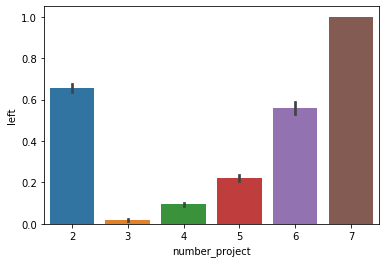

In [29]:
sns.barplot(data['number_project'],data['left'])